In [1]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from main import *

Device: cuda


In [2]:
TRAINED_MODEL_PATH = "models/Transfer_ResNet22_trained_testAcc=0.6202.pth"
MODEL_TYPE = "Transfer_ResNet22"

In [3]:
train_df = pd.read_csv(TRAIN_LABELS_PATH)
val_df = pd.read_csv(VAL_LABELS_PATH)
test_df = pd.read_csv(TEST_LABELS_PATH)

In [4]:
BATCH_SIZE = 1
SR = SAMPLE_RATE
AUDIO_DURATION = 10
NB_SPECIES = len(set(train_df['label']))
print("NB_SPECIES: ", NB_SPECIES)

RANDOM_STATE = 17
random.seed(RANDOM_STATE)

NB_SPECIES:  13


In [5]:
criterion = nn.CrossEntropyLoss()
model = load_model(model_type=MODEL_TYPE, sample_rate=SR, nb_species=NB_SPECIES, 
                   model_path=TRAINED_MODEL_PATH, after_train=True)

C:\Users\Richard\Anaconda3\envs\Pytorch-gpu\lib\site-packages\librosa\filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


GPU number: 1
Load pretrained model successfully!


In [6]:
testloader = process_data(df=test_df, batch_size=BATCH_SIZE, 
                          sample_rate=SR, audio_duration=AUDIO_DURATION, 
                          random_state=RANDOM_STATE, do_plot=False)

Valid files: 624
Unvalid files: 0
Vstacking data...
Attributing arrays to dataloader...
Data processing duration: 0min 20s



In [7]:
history_training = {}
dataloaders = {'test': testloader[0]}
dataset_sizes = {'test': testloader[1]}

In [8]:
history_training = test_model(model=model, hist=history_training, criterion=criterion, 
                              dataloaders=dataloaders, dataset_sizes=dataset_sizes)


**TESTING**
Test stats -  Loss: 1.2296 Acc: 63.30%
Inference on Testset complete in 14.9s



In [9]:
y_pred = [y.cpu() for y in history_training['y_pred']]
y_true = [y.cpu() for y in history_training['y_true']]

In [10]:
accuracy = round(accuracy_score(y_true, y_pred)*100, 3)
mse = round(mean_squared_error(y_true, y_pred), 3)
print(f'Accuracy: {accuracy}%')
print(f'MSE: {mse}')
target_names = [f'class {i+1}' for i in range(NB_SPECIES)]
print(classification_report(y_true, y_pred, target_names=target_names))

Accuracy: 63.301%
MSE: 6.534
              precision    recall  f1-score   support

     class 1       0.69      0.55      0.61        20
     class 2       0.59      0.76      0.67        17
     class 3       0.48      0.41      0.44        29
     class 4       0.47      0.34      0.39        44
     class 5       0.67      0.71      0.69        76
     class 6       0.69      0.32      0.44        34
     class 7       0.73      0.59      0.65       111
     class 8       0.57      0.72      0.64        95
     class 9       0.53      0.65      0.58        69
    class 10       0.53      0.35      0.42        23
    class 11       0.77      0.87      0.82        23
    class 12       0.76      0.76      0.76        17
    class 13       0.74      0.91      0.82        66

    accuracy                           0.63       624
   macro avg       0.63      0.61      0.61       624
weighted avg       0.63      0.63      0.62       624



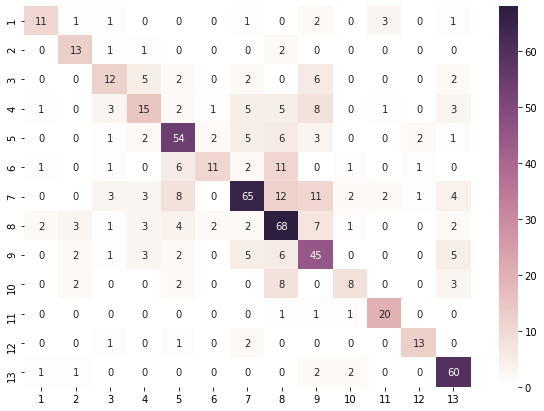

In [11]:
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index = [i+1 for i in range(NB_SPECIES)], 
                     columns = [i+1 for i in range(NB_SPECIES)])
plt.figure(figsize = (10,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df_cm, cmap=cmap, annot=True)
plt.show()